<img src="../logo/logo.jpg">

# Table of Contents
* [1. Maching Learning](#1.-Maching-Learning)
	* [1.1 Modelo de regresión logística](#1.1-Modelo-de-regresión-logística)
	* [1.2 Predicción con Arboles de decisión](#1.2-Predicción-con-Arboles-de-decisión)
	* [1.3 Predicción con Random Forest](#1.3-Predicción-con-Random-Forest)


# 1. Maching Learning

[Scikit-learn](http://scikit-learn.org/stable/) es una librería que incluye la implementación de un gran número de algoritmos de aprendizaje, siendo básica para trabajar con __ML__.

La podemos utilizar para realizar _clasificaciones_, _extraccion de características_, _regresiones_, _agrupaciones_, _reducción de dimensiones_, _selección de modelos_ o _preprocesamiento_.

Esta librería también nos facilita las tareas de evaluación, diagnostico y validaciones cruzadas ya que nos proporciona varios métodos de fábrica para poder realizar estas tareas de forma muy simple.

__Pregunta:__

¿Se puede predecir la característica `deja_la_empresa` a partir del resto de los datos?

`deja_la_empres` = 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
#from   sklearn.model_selection import train_test_split       # sustituye a cross_validation
from sklearn.cross_validation import train_test_split         # desapare en la versión 0.20



from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectFromModel;

C:\Users\Yoli\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Lo primero que hacemos es convertir las variables categóricas en variables indicadoras. Lo hacemos mediante la función __get_dummies()__.

In [3]:
tabla = pd.read_csv('./datos/HR_comma.csv')
tabla = tabla.dropna()                             # borramos las observaciones con NaN

# variables categóricas en variables indicadoras
tabla_copy = pd.get_dummies(tabla)                 # guardamos el resultado en una copia
tabla_copy.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,deja_la_empresa,promociona,dep_IT,dep_RandD,...,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,salario_high,salario_low,salario_medium
0,0.38,0.53,2.0,157,3,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262,6,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223,5,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.41,0.50,2.0,153,3,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.10,0.77,6.0,247,4,0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
tabla_copy.info()      # No hay NaN en la tabla

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14994 entries, 0 to 14998
Data columns (total 21 columns):
nivel_de_satisfaccion    14994 non-null float64
ultima_encuesta          14994 non-null float64
numero_de_proyectos      14994 non-null float64
media_horas_mes          14994 non-null int64
horas_en_la_empresa      14994 non-null int64
accidente_de_trabajo     14994 non-null int64
deja_la_empresa          14994 non-null float64
promociona               14994 non-null int64
dep_IT                   14994 non-null float64
dep_RandD                14994 non-null float64
dep_accounting           14994 non-null float64
dep_hr                   14994 non-null float64
dep_management           14994 non-null float64
dep_marketing            14994 non-null float64
dep_product_mng          14994 non-null float64
dep_sales                14994 non-null float64
dep_support              14994 non-null float64
dep_technical            14994 non-null float64
salario_high             14994 non-

A continuación, construimos la matriz de variables independientes `X` y la variable dependiente `y`.

In [5]:
# y = variable dependiente
y = tabla_copy.pop('deja_la_empresa')
# X = matriz de variables independientes
X = tabla_copy

In [6]:
y.unique(), len(y)         # valores distintos de la variable y

(array([ 1.,  0.]), 14994)

In [7]:
X.head()

,nivel_de_satisfaccion,ultima_encuesta,numero_de_proyectos,media_horas_mes,horas_en_la_empresa,accidente_de_trabajo,promociona,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical,salario_high,salario_low,salario_medium
0,0.38,0.53,2.0,157,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5.0,262,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5.0,223,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.41,0.50,2.0,153,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.10,0.77,6.0,247,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
len(X)

14994

Para aplicar el modelo de regresión logística, el tipo de los datos (y, X) ha de ser array de NumPy.

In [9]:
type(y), type(X)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

Nos quedamos con los valores de la Serie y del DataFrame

In [10]:
y = y.values
X = X.values

In [11]:
type(y), type(X)

(numpy.ndarray, numpy.ndarray)

Dividimos los datasets en entrenamiento y evaluación:

In [12]:
# Xtrain con el 80% de los datos
# Xtest  con el 20 de los datos
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)
len(Xtest), len(Xtest)/len(X),len(Xtrain), len(Xtrain)/len(X)

(2999, 0.20001333866880086, 11995, 0.7999866613311991)

## 1.1 Modelo de regresión logística

Creamos el modelo de regresión logística

In [13]:
# importando el modelo de regresión logística
from sklearn.linear_model import LogisticRegression

# Creando el modelo
modelo_rl = LogisticRegression()    
# Ajustando el modelo
modelo_rl.fit(Xtrain, ytrain)

# Realizando las predicciones
y_predic_test = modelo_rl.predict(Xtest) 


In [14]:
dejaE  = pd.Series(y_predic_test, name = 'deja la empresa')
datos = pd.DataFrame(Xtest, columns = tabla_copy.columns)
datos.insert(19, column = 'deja_la Empresa', value = dejaE)
datos.to_excel('para_jefe.xlsx', header = True, index = False)

In [15]:
Xtest.shape

(2999, 20)

Podemos preguntar por la bondad del ajuste con la función __score__. Como podemos ver a continuación, el ajuste es mejor 

In [16]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_rl.score(Xtest, ytest)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con RL: ', ajuste_test)

Bondad del ajuste con RL:  0.782594198066


In [17]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_rl.score(Xtrain, ytrain)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con RL: ', ajuste_test)

Bondad del ajuste con RL:  0.782576073364


## 1.2 Predicción con Arboles de decisión

In [29]:
# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Creando el modelo. Árboles con profundidad 3
modelo_ad = DecisionTreeClassifier(max_depth = 3 )     # Creando el modelo
# Ajustando el modelo
modelo_ad.fit(Xtrain, ytrain);


In [30]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_ad.score(Xtest, ytest)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con Árbol de decisión: ', ajuste_test)

Bondad del ajuste con Árbol de decisión:  0.956318772924


## 1.3 Predicción con Random Forest

Uno de los métodos más populares usados por los científicos de datos es el algoritmo __Random Forest__, uno de los mejores algoritmos de clasificación, capaz de organizar grandes cantidades de datos con exactitud.

In [32]:
# Importando el random forest
from sklearn.ensemble import RandomForestClassifier

# Creando el modelo
modelo_rf = RandomForestClassifier()
# Ajustando el modelo
modelo_rf.fit(Xtrain, ytrain)

# Realizando las predicciones
y_predic_test = modelo_rf.predict(Xtest)


In [33]:
# calculamos las bondad del ajuste para los datos de test y de entrenamiento
ajuste_test = modelo_rf.score(Xtest, ytest)      #coef de determinación o bondad del ajuste
print('Bondad del ajuste con Random Forest: ', ajuste_test)

Bondad del ajuste con Random Forest:  0.990996999


Parece que el modelo Random forest ofrece mejores resultados. Además podemos conocer las características que más influyen en el modelo. 
En nuestro ejemplo tenemos 20 características: 

In [22]:
tabla_copy.shape

(14994, 20)

In [34]:
# nombres de las características
caracteristicas = tabla_copy.columns.values      
caracteristicas

array(['nivel_de_satisfaccion', 'ultima_encuesta', 'numero_de_proyectos',
       'media_horas_mes ', 'horas_en_la_empresa', 'accidente_de_trabajo',
       'promociona', 'dep_IT', 'dep_RandD', 'dep_accounting', 'dep_hr',
       'dep_management', 'dep_marketing', 'dep_product_mng', 'dep_sales',
       'dep_support', 'dep_technical', 'salario_high', 'salario_low',
       'salario_medium'], dtype=object)

In [35]:
# estimación de la importancia de las características
# el valor más alto corresponde a la característica más importante
estimacion = modelo_rf.feature_importances_
estimacion

array([ 0.3061267 ,  0.1344605 ,  0.18174854,  0.14930759,  0.17395542,
        0.01311585,  0.0017315 ,  0.00177051,  0.00230717,  0.00172482,
        0.00140329,  0.00118625,  0.00128214,  0.00139829,  0.00438037,
        0.00308383,  0.00372241,  0.00695768,  0.00741527,  0.00292188])

Emparejamos cada característica con su estimación:

In [40]:
estimaciones = dict(zip(caracteristicas, estimacion))
estimaciones
valores = pd.DataFrame(estimaciones, index = ['valor'])
valores = valores.T
valores

,valor
accidente_de_trabajo,0.013116
dep_IT,0.001771
dep_RandD,0.002307
dep_accounting,0.001725
dep_hr,0.001403
dep_management,0.001186
dep_marketing,0.001282
dep_product_mng,0.001398
dep_sales,0.004380
dep_support,0.003084


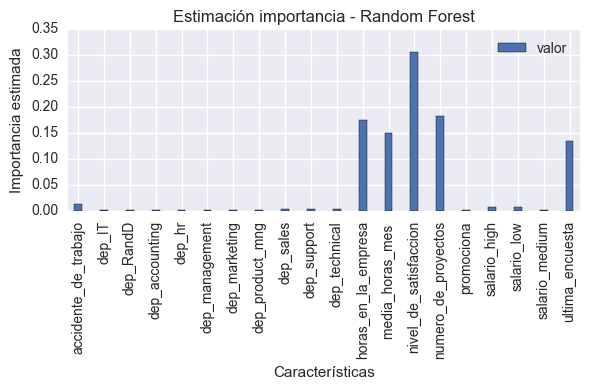

In [39]:
#f, ax = plt.figure(figsize=(5, 8))
valores.plot(kind = 'bar',  
             width = 0.3  ,         #anchura de las barras
             align = 'center'
             )
plt.title('Estimación importancia - Random Forest')
plt.ylabel('Importancia estimada')
plt.xlabel('Características')
plt.legend(loc='best')
plt.tight_layout();


# References



* [Python Data Analysis Library](http://pandas.pydata.org/)
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
